In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import euclidean

# Load data from Excel file
data = pd.read_excel('/content/drive/MyDrive/roshan/TEM-1/WT_R_S.xlsx')
print(data)

      GROUP   TYPE    A:26-psi    A:26-phi    A:27-psi   A:27-phi   A:28-psi  \
0         S  E104K  127.241354  -75.098540  -62.650572 -39.722024 -37.874813   
1         S  E104K  132.861109  -98.560522  -31.851220 -48.659923 -25.162496   
2         S  E104K  120.901924  -80.540634  -19.461292 -66.487818 -21.550063   
3         S  E104K  131.474034  -81.987868  -39.636361 -45.751893 -28.405002   
4         S  E104K  121.479745  -78.573936  -33.628473 -57.704813 -41.583794   
...     ...    ...         ...         ...         ...        ...        ...   
69995     S     WT  153.478999 -133.998705  133.417426 -65.598156  -2.364675   
69996     S     WT  153.820019 -120.422637  115.354125 -70.821374 -10.729115   
69997     S     WT  137.376687  -77.096703  -33.897390 -72.428754 -32.098487   
69998     S     WT  126.051259  -44.949237  -28.187224 -69.207144 -25.048866   
69999     S     WT  112.781801  -76.927670  -22.084983 -57.454099 -26.028836   

         A:28-phi   A:29-psi   A:29-phi

In [ ]:
# Map 'S' and 'R' to numerical values for the target variable
data['GROUP'] = data['GROUP'].map({'S': 0, 'R': 1})

In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop(['GROUP', 'TYPE'], axis=1)
X = X.iloc[:, :-4]
y = data['GROUP']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the features in X
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame if needed
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

print(X_normalized.head())


   A:26-psi  A:26-phi  A:27-psi  A:27-phi  A:28-psi  A:28-phi  A:29-psi  \
0  0.853450  0.290814  0.326072  0.389339  0.396350  0.354144  0.664139   
1  0.869060  0.225552  0.411661  0.364491  0.431928  0.259969  0.596379   
2  0.835840  0.275676  0.446091  0.314928  0.442038  0.260005  0.617419   
3  0.865207  0.271651  0.390027  0.372576  0.422853  0.274625  0.591569   
4  0.837445  0.281147  0.406722  0.339346  0.385970  0.282595  0.638488   

   A:29-phi  A:30-psi  A:30-phi  ...  A:286-psi  A:286-phi  A:287-psi  \
0  0.542730  0.596728  0.320386  ...   0.556046   0.361792   0.492823   
1  0.526030  0.658471  0.376523  ...   0.515322   0.373419   0.495446   
2  0.394325  0.635102  0.448278  ...   0.592771   0.326014   0.529994   
3  0.549371  0.585059  0.419625  ...   0.575260   0.339348   0.581841   
4  0.616842  0.566553  0.386201  ...   0.595311   0.301244   0.583424   

   A:287-phi  A:288-psi  A:288-phi  A:289-psi  A:289-phi  A:290-psi  A:290-phi  
0   0.544998   0.499646   0.4

In [ ]:
print(X_normalized)
print("Target variable:")
print(y)

       A:26-psi  A:26-phi  A:27-psi  A:27-phi  A:28-psi  A:28-phi  A:29-psi  \
0      0.853450  0.290814  0.326072  0.389339  0.396350  0.354144  0.664139   
1      0.869060  0.225552  0.411661  0.364491  0.431928  0.259969  0.596379   
2      0.835840  0.275676  0.446091  0.314928  0.442038  0.260005  0.617419   
3      0.865207  0.271651  0.390027  0.372576  0.422853  0.274625  0.591569   
4      0.837445  0.281147  0.406722  0.339346  0.385970  0.282595  0.638488   
...         ...       ...       ...       ...       ...       ...       ...   
69995  0.926334  0.126977  0.870927  0.317401  0.495733  0.194502  0.705865   
69996  0.927281  0.164740  0.820731  0.302880  0.472323  0.222877  0.757175   
69997  0.881604  0.285256  0.405975  0.298412  0.412516  0.264304  0.733219   
69998  0.850144  0.374678  0.421843  0.307368  0.432246  0.258599  0.728369   
69999  0.813283  0.285726  0.438800  0.340043  0.429503  0.213166  0.671210   

       A:29-phi  A:30-psi  A:30-phi  ...  A:286-psi

In [ ]:
# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_normalized, y)

# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

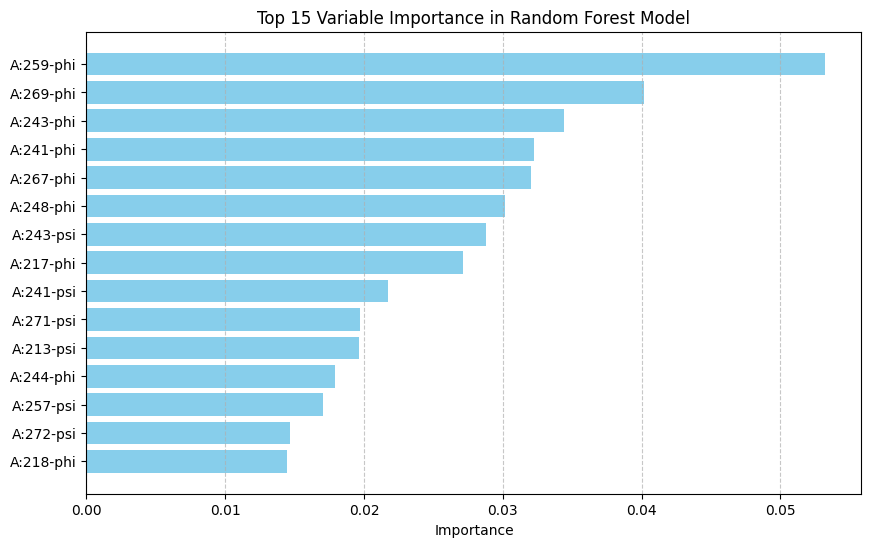

Model Accuracy: 0.92


In [ ]:
# Get the column names (feature names) from the DataFrame
feature_names = X_normalized.columns

# Create a DataFrame for easier sorting and plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Take the top 15 variables
top_features = feature_importance_df.head(15)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 15 Variable Importance in Random Forest Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Evaluate model accuracy using cross-validation
accuracy = cross_val_score(rf_classifier, X_normalized, y, cv=5).mean()
print(f"Model Accuracy: {accuracy:.2f}")


In [ ]:
# Cross-validate R² scores
r2_scores = cross_val_score(rf_classifier, X_normalized, y, cv=5, scoring=make_scorer(r2_score))

print("R² values for each fold:", r2_scores)
print(f"Mean R²: {r2_scores.mean():.2f}")


R² values for each fold: [0.53858333 0.11391667 0.706      0.99970833 1.        ]
Mean R²: 0.67


In [ ]:

# Train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_normalized, y)

# Make predictions
y_pred = cross_val_predict(rf_regressor, X_normalized, y, cv=5)

# Calculate the R^2 score
r2 = r2_score(y, y_pred)
print(f"R² Value: {r2:.2f}")

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='skyblue', edgecolor='k')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)  # Line of perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values (R²)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
